In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=20, hidden_layer2=20, output_features=1):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)  
        return x

    def fit(self, x_train, y_train, x_test, y_test, epochs, optimizer, criterion):
        training_losses = []
        testing_losses = []

        for i in range(epochs):
            self.train()
            optimizer.zero_grad()
            y_pred = self(x_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()
            
            training_losses.append(loss.item())

            with torch.no_grad():
                y_pred_test = self(x_test)
                loss_test = criterion(y_pred_test, y_test)
                testing_losses.append(loss_test.item())
            print(f'epoch:{i:2} loss: {loss.item():10.8f}')

        plt.plot(range(epochs), training_losses, color='green')
        plt.plot(range(epochs), testing_losses, color='red')
        plt.ylabel('Loss')
        plt.xlabel('epoch')
        plt.legend(["Training_loss", "Validation_loss"], loc="upper right")
        plt.show()

    def predict(self, x_test):
        preds = []
        with torch.no_grad():
            for val in x_test:
                y_hat = self(val)
                preds.append(y_hat.item())
        return preds


epoch: 0 loss: 1556.12060547
epoch: 1 loss: 1508.38439941
epoch: 2 loss: 1461.41577148
epoch: 3 loss: 1415.22766113
epoch: 4 loss: 1369.82946777
epoch: 5 loss: 1325.23315430
epoch: 6 loss: 1281.44836426
epoch: 7 loss: 1238.48535156
epoch: 8 loss: 1196.35156250
epoch: 9 loss: 1155.05480957
epoch:10 loss: 1114.60278320
epoch:11 loss: 1075.00170898
epoch:12 loss: 1036.25634766
epoch:13 loss: 998.37036133
epoch:14 loss: 961.34600830
epoch:15 loss: 925.18487549
epoch:16 loss: 889.88769531
epoch:17 loss: 855.45422363
epoch:18 loss: 821.88122559
epoch:19 loss: 789.16668701
epoch:20 loss: 757.30816650
epoch:21 loss: 726.29919434
epoch:22 loss: 696.13299561
epoch:23 loss: 666.80499268
epoch:24 loss: 638.30920410
epoch:25 loss: 610.63507080
epoch:26 loss: 583.77496338
epoch:27 loss: 557.72106934
epoch:28 loss: 532.46582031
epoch:29 loss: 507.99465942
epoch:30 loss: 484.30029297
epoch:31 loss: 461.37039185
epoch:32 loss: 439.19259644
epoch:33 loss: 417.75656128
epoch:34 loss: 397.04727173
epoch:3

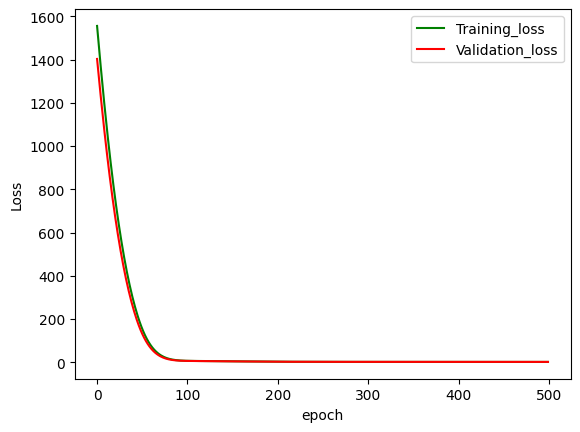

In [3]:
if __name__ == "__main__":
    data = fetch_california_housing()
    x = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.FloatTensor(y_train).reshape(-1, 1)
    y_test = torch.FloatTensor(y_test).reshape(-1, 1)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    hidden_size = 20

    model = Model(input_features=input_size, hidden_layer1=hidden_size, hidden_layer2=hidden_size, output_features=output_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    epochs = 500
    model.fit(X_train, y_train, X_test, y_test, epochs, optimizer, criterion)

    predicted_values = model.predict(X_test)